In [68]:
import subprocess
import os
import numpy as np 
import scienceplots
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

plt.style.use("science")

EXEC_PATH = "/Applications/topas/bin/topas "

os.environ["TOPAS_G4_DATA_DIR"] = "/Applications/G4Data"
os.environ["QT_QPA_PLATFORM_PLUGIN_PATH"] = "/Applications/topas/Frameworks"

def topas(filepath):
    return subprocess.run(EXEC_PATH + filepath, env=os.environ, shell=True)

def plate_thickness_file(original_fp, new_fp, thickness):
    try:
        with open(original_fp, 'r') as original:
            with open(new_fp, 'w') as new:
                new.write(original.read())
                new.write(f'\n\nd:Ge/Plate/HL = {thickness} cm\ns:Sc/DoseScorer/OutputFile = "./part_a/outputs/job{thickness}"')
    except FileNotFoundError:
        print("File not found.")
    return new_fp

In [165]:
phantom_length = 40 # cm
unit_length = phantom_length/1000 # cm

In [ ]:
# Bragg Peak for the Al plate at 
(28.112000000000002, 0.029933259094191467)

In [35]:
thickness = 0.2
topas(plate_thickness_file("./base_a.txt", f"./part_a/jobs/job{thickness}.txt", thickness))


Welcome to TOPAS, Tool for Particle Simulation (Version 3.9)
Loading parameters starting from: ./part_a/jobs/job0.2.txt

Geant4 Data directory has been specified by the
TOPAS_G4_DATA_DIR environment variable as /Applications/G4Data

**************************************************************
 Geant4 version Name: geant4-10-07-patch-03 [MT]   (19-November-2021)
  << in Multi-threaded mode >> 
                       Copyright : Geant4 Collaboration
                      References : NIM A 506 (2003), 250-303
                                 : IEEE-TNS 53 (2006), 270-278
                                 : NIM A 835 (2016), 186-225
                             WWW : http://geant4.org/
**************************************************************

TOPAS is in MT mode, setting number of threads to: 1

TOPAS set the tolerances based on the World size to:
      Surface tolerance = 0.002 nm, and radial tolerance = 0.002 nm.
Checking overlaps for volume Phantom (G4Tubs) ... OK! 
Checking ov

CompletedProcess(args='/Applications/topas/bin/topas ./part_a/jobs/job0.2.txt', returncode=0)

(28.439999999999998, 0.0)

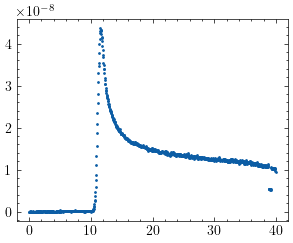

In [37]:
doses = np.genfromtxt(f'./part_a/outputs/job{thickness}.csv', delimiter=',')[:, -1]

plt.scatter(
    [unit_length*i for i in range(0, 1000)],
    doses,
    s=1
)

bragg_peaks = np.array([
    unit_length * np.argmax(doses, axis=0)
])

40 - np.mean(bragg_peaks), np.std(bragg_peaks)

Bragg peak vs plate thickness

In [90]:
thicknesses = np.arange(5, 35, 5)

In [91]:
thicknesses

array([ 5, 10, 15, 20, 25, 30])

In [92]:
peaks = []
peak_unc = []

for thickness in thicknesses:
    doses = np.array([np.genfromtxt(f'./part_a/outputs_thick{thickness}/job{i}.csv', delimiter=',')[:, -1] for i in range(1, 4)])
    bragg_peaks = unit_length*np.argmax(doses, axis=1)
    peaks.append(40 - np.mean(bragg_peaks))
    peak_unc.append(np.std(bragg_peaks))


In [93]:
f = lambda x, m, c: m*x + c

m, c = curve_fit(f, thicknesses/100, peaks, sigma=peak_unc)[0]

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]

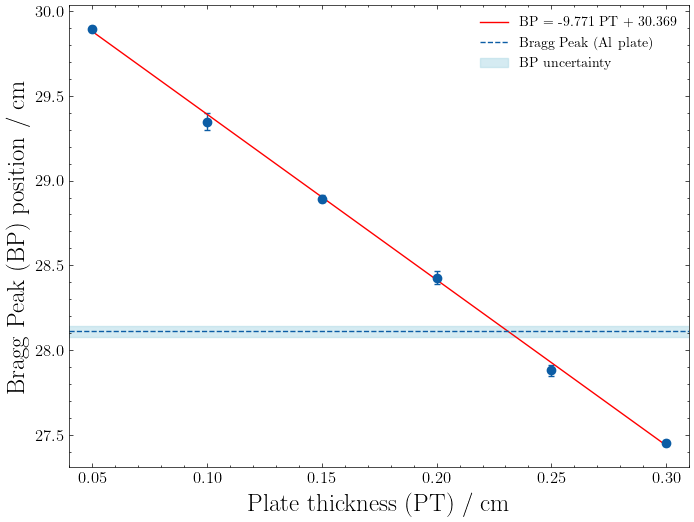

In [155]:
plt.figure(figsize=(8,6))

plt.errorbar(
    x = thicknesses/100,
    y = peaks,
    yerr=peak_unc,
    marker="o",
    capsize=2,
    ls="none"
)
plt.plot(
    thicknesses/100,
    m*thicknesses/100 + c,
    c="red",
    label=f"BP = {round(m,3)} PT + {round(c,3)}"
)

plt.axhline(y = 28.11, ls="--", label="Bragg Peak (Al plate)")
plt.fill_between([0] + list(thicknesses/100) + [.35], 28.11 - 0.03, 28.11 + 0.03, color='lightblue', alpha=0.5, label="BP uncertainty")
plt.tick_params(axis='both', which='major', labelsize=12)

plt.xlabel("Plate thickness (PT) / cm", fontsize=18)
plt.ylabel("Bragg Peak (BP) position / cm", fontsize=18)
plt.legend()
plt.xlim(0.04, .31)
plt.savefig("./plots/bp_pt.png", dpi=300)

In [108]:
PT = (28.11 - c)/m
print(PT)
PT_unc1 = (28.14 - c)/m
print(PT - PT_unc1)

0.23118239975379884
0.0030702759911575006


Bragg peak for lead plate 0.23 cm thick

In [113]:
doses = np.array([np.genfromtxt(f'./bragg_peak/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)])

bragg_peaks = np.array([
    unit_length * np.argmax(doses, axis=1)
])

40 - np.mean(bragg_peaks), np.std(bragg_peaks)

(28.112000000000002, 0.04664761515876238)

In [166]:
np.array([unit_length*i for i in range(1000)])

array([ 0.  ,  0.04,  0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,
        0.36,  0.4 ,  0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,
        0.72,  0.76,  0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ,  1.04,
        1.08,  1.12,  1.16,  1.2 ,  1.24,  1.28,  1.32,  1.36,  1.4 ,
        1.44,  1.48,  1.52,  1.56,  1.6 ,  1.64,  1.68,  1.72,  1.76,
        1.8 ,  1.84,  1.88,  1.92,  1.96,  2.  ,  2.04,  2.08,  2.12,
        2.16,  2.2 ,  2.24,  2.28,  2.32,  2.36,  2.4 ,  2.44,  2.48,
        2.52,  2.56,  2.6 ,  2.64,  2.68,  2.72,  2.76,  2.8 ,  2.84,
        2.88,  2.92,  2.96,  3.  ,  3.04,  3.08,  3.12,  3.16,  3.2 ,
        3.24,  3.28,  3.32,  3.36,  3.4 ,  3.44,  3.48,  3.52,  3.56,
        3.6 ,  3.64,  3.68,  3.72,  3.76,  3.8 ,  3.84,  3.88,  3.92,
        3.96,  4.  ,  4.04,  4.08,  4.12,  4.16,  4.2 ,  4.24,  4.28,
        4.32,  4.36,  4.4 ,  4.44,  4.48,  4.52,  4.56,  4.6 ,  4.64,
        4.68,  4.72,  4.76,  4.8 ,  4.84,  4.88,  4.92,  4.96,  5.  ,
        5.04,  5.08,

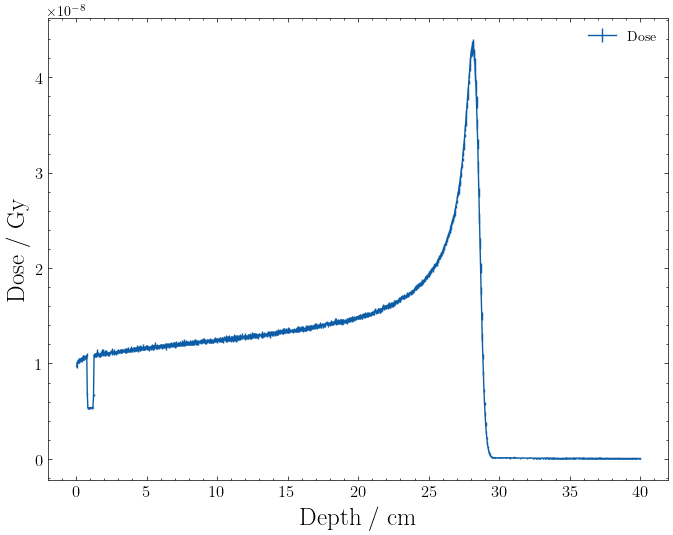

In [167]:
plt.figure(figsize=(8,6))

plt.errorbar(
    40 - np.array([unit_length*i for i in range(1000)]),
    np.mean(doses, axis=0),
    yerr=np.std(doses, axis=0),
    label="Dose"
)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Depth / cm", fontsize=18)
plt.ylabel("Dose / Gy", fontsize=18)
plt.legend()

plt.savefig("./plots/Dose_Depth_Pb_ex3_6.png", dpi=300)

Radial distribution - part 2

In [156]:
radial_length = 15 # cm
unit_length = radial_length/1000

Text(0, 0.5, 'Energy deposit / MeV')

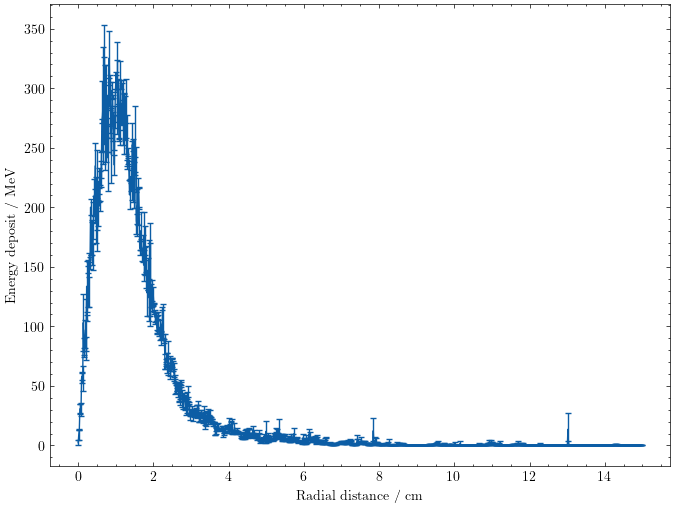

In [157]:
plt.figure(figsize=(8,6))
energy_dist = np.array([np.genfromtxt(f'./part_b/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,3)])

plt.errorbar(
    [unit_length * i for i in range(0,1000)],
    np.mean(energy_dist, axis = 0),
    yerr=np.std(energy_dist, axis = 0),
    capsize=2
    )

plt.xlabel("Radial distance / cm")
plt.ylabel("Energy deposit / MeV")

2.843586
0.15097599346916052
----


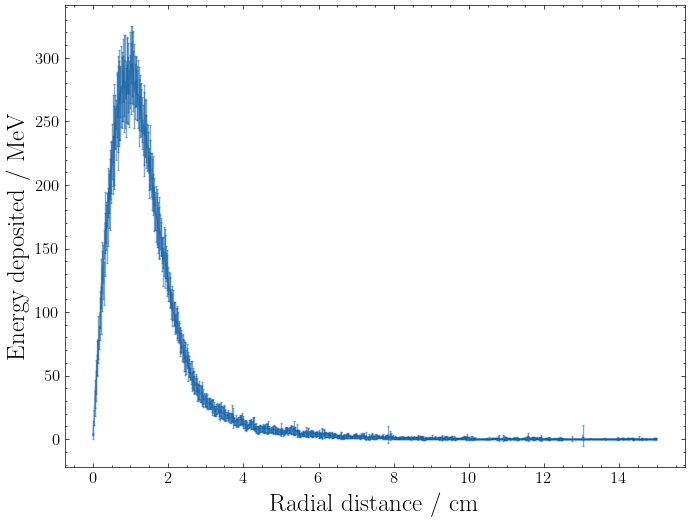

In [163]:
plt.figure(figsize=(8,6))

'''energy_dist = np.array([np.genfromtxt(f'./part_b/outputs_pos{str(pos)}/job{i}.csv', delimiter=',')[:, -1] for i in range(1,10)])
avg_beam = np.mean(energy_dist, axis = 0)
beam_unc = np.std(energy_dist, axis = 0)

# Get maximum beam position
max_pos = np.argmax(avg_beam)

# Get radius of beam and uncertainty of its width

print(np.where(avg_beam < avg_beam[max_pos]/np.exp(2))[0][0] * unit_length)
#print(np.where(avg_beam < (avg_beam[max_pos] + beam_unc[max_pos])/np.exp(2))[0][0] * unit_length)
#print(np.where(avg_beam < (avg_beam[max_pos] - beam_unc[max_pos])/np.exp(2))[0][0] * unit_length)'''
energy_dist = np.array([np.genfromtxt(f'./part_b/outputs/job{i}.csv', delimiter=',')[:, -1] for i in range(1,11)])
mean_beam = np.mean(energy_dist, axis = 0)
beam_error = np.std(energy_dist, axis = 0)
max_pos = np.argmax(mean_beam)

synth_beam_radius = []

for i in range(10000):
    synth_beam = np.random.normal(mean_beam, beam_error)
    idxs = np.setdiff1d(np.arange(len(synth_beam)), np.where(synth_beam < synth_beam[max_pos]/np.exp(2)))
    synth_beam_radius.append(unit_length*(idxs[-1] - idxs[0]))


plt.errorbar(
    [unit_length * i for i in range(0,1000)],
    np.mean(energy_dist, axis = 0),
    yerr=np.std(energy_dist, axis = 0),
    capsize=1,
    alpha=.5)

plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel("Radial distance / cm", fontsize=18)
plt.ylabel("Energy deposited / MeV", fontsize=18)

idxs = np.setdiff1d(np.arange(len(mean_beam)), np.where(mean_beam < mean_beam[max_pos]/np.exp(2)))
beam_radius = unit_length*(idxs[-1] - idxs[0])
print(np.mean(synth_beam_radius))
print(np.std(synth_beam_radius))
print("----")

plt.savefig("./plots/pb_beam_radius.png", dpi=300)